In [1]:
# To extract data from .h5 files and put it into the arrays we need to make the following plots:
# rate vs time, temperature vs time, rate vs temperature
# The other slow control parameters (humidity, pressure and magnetic field) are also extracted.

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import pandas as pd
import os
from glob import glob
import numpy as np
import scipy as scipy
from scipy import stats 
import scipy.optimize as optimize
from scipy.optimize import curve_fit

matplotlib.rc('font', size=16)                   # Use big fonts...
plt.rcParams['figure.figsize'] = (12.0, 10.0)    # ... and big plots

In [2]:
# Read in data sets with pandas
store0107 = pd.HDFStore('ANA_mx_n_20160107_1209.h5')
store0108 = pd.HDFStore('ANA_mx_n_20160108_1934.h5')
store0113 = pd.HDFStore('ANA_mx_n_20160113_1228.h5')
store0116 = pd.HDFStore('ANA_mx_n_20160116_0940.h5')
store0119 = pd.HDFStore('ANA_mx_n_20160119_0803.h5')
store0122 = pd.HDFStore('ANA_mx_n_20160122_1556.h5')

In [3]:
# From analysis/monitor/fitspectrum.C: the energies corresponding to the photopeaks 

fit_values = {}

for i in range(8):
    fit_values[i] = {}

fit_values[0][0] = ('1460 keV','BG')
fit_values[1][0] = ('1460 keV','BG')

fit_values[2][0] = ('511 keV','Ti')
fit_values[3][0] = ('511 keV','Ti')
fit_values[2][1] = ('1157 keV','Ti')
fit_values[3][1] = ('1157 keV','Ti')
fit_values[2][2] = ('511.+1157 keV','Ti')
fit_values[3][2] = ('511.+1157 keV','Ti')


fit_values[4][0] = ('1173 keV','Co')
fit_values[5][0] = ('1173 keV','Co')
fit_values[4][1] = ('1332 keV','Co')
fit_values[5][1] = ('1332 keV','Co')
fit_values[4][2] = ('1332 + 1173 keV','Co')
fit_values[5][2] = ('1332 + 1173 keV','Co')

fit_values[6][0] = ('662 keV','Cs')
fit_values[7][0] = ('662 keV','Cs')

In [4]:
# Definition of needed functions:

# beautifull recursive defaultdict so that automatically all calls that do not excist return a new empty dict
from collections import defaultdict
def recursive_defaultdict():
    return defaultdict(recursive_defaultdict)

# Exponential to fit to find A0
def exp(x, A_0): # A_0=activity at t=0 in Bq, and half life time in seconds 
    return A_0*np.exp(-(x*60*60.)*np.log(2)/(half_life_time))

# Function to fit a function to data
def fit_signal(signal, guess, x):
    popt, pcov = curve_fit(exp, x, signal, guess)
    perr = np.sqrt(np.diag(pcov))
    A0 = popt[0]
    errA0 = perr[0]
    Fitted_exp_decay = exp(x, *popt)
    print("Half life time : %s yr" %(half_life_time/(365.25*24*60*60)))
    print("A0 : %s +- %s Bq" %(A0, errA0))
    return Fitted_exp_decay, A0, errA0

# Define residual rate:
def residual(x, exponent_and_modulation_and_noise, fit, plot_function = True):
    residual = (exponent_and_modulation_and_noise) - fit
    return residual

# Fit a gauss to residual histogram
def gauss(x,*p):
    A_g,mu_g, sigma_g = p
    return A_g*np.exp(-(x-mu_g)**2/(2.*sigma_g**2))

In [5]:
# Shows when the data was taken: e.g. data0107: from the 7th of Janaury.
dates = {}
data0107 = store0107['/ana']
data0108 = store0108['/ana']
data0113 = store0113['/ana']
data0116 = store0116['/ana']
data0119 = store0119['/ana']
data0122 = store0122['/ana']

# pandas datas is needed for "groupby(['channel','peak']))"
datas = pd.concat((data0107,data0108,data0113,data0116,data0119,data0122))

# make all the values in the data['time'] unique, so only 1 time array is left instead of for all channels and peaks. 
# this means we have 1 array of the time instead of an array with every timemeasurement 16 times = 16 x the same time array parallel. 
# and put time in hours instead of seconds, while we're messing with it anyway
data0107_time_unique = np.unique(np.array(data0107['time'].values/(60*60)))
data0108_time_unique = np.unique(np.array(data0108['time'].values/(60*60)))
data0113_time_unique = np.unique(np.array(data0113['time'].values/(60*60)))
data0116_time_unique = np.unique(np.array(data0116['time'].values/(60*60)))
data0119_time_unique = np.unique(np.array(data0119['time'].values/(60*60)))
data0122_time_unique = np.unique(np.array(data0122['time'].values/(60*60)))

# Let's assume that when a new run is started there is a timegap of about 30 seconds (estimated from experience).
# When the computer needed a restart the time there was no measurement is written down on Nikhef modulation elog wiki.
new_data_time_0107 = data0107_time_unique
new_data_time_0108 = (data0108_time_unique-(min(data0108_time_unique))+max(data0107_time_unique)+(5./60))
new_data_time_0113 = (data0113_time_unique-(min(data0113_time_unique))+max(new_data_time_0108)+(0.5/60))
new_data_time_0116 = (data0116_time_unique-(min(data0116_time_unique))+max(new_data_time_0113)+(0.5/60))
new_data_time_0119 = (data0119_time_unique-(min(data0119_time_unique))+max(new_data_time_0116)+0.5/60)
new_data_time_0122 = (data0122_time_unique-(min(data0122_time_unique))+max(new_data_time_0119)+0.5/60)

# add time from all data sets together in one time-array for the combined data
data_time_hours = np.concatenate((new_data_time_0107, new_data_time_0108, new_data_time_0113, new_data_time_0116, new_data_time_0119, new_data_time_0122))

For ('1460 keV', 'BG'):
Half life time : 1251000000.0 yr
A0 : 3.09405855128 +- 1.62004304599 Bq


C:\Users\Dorine\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:2651: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


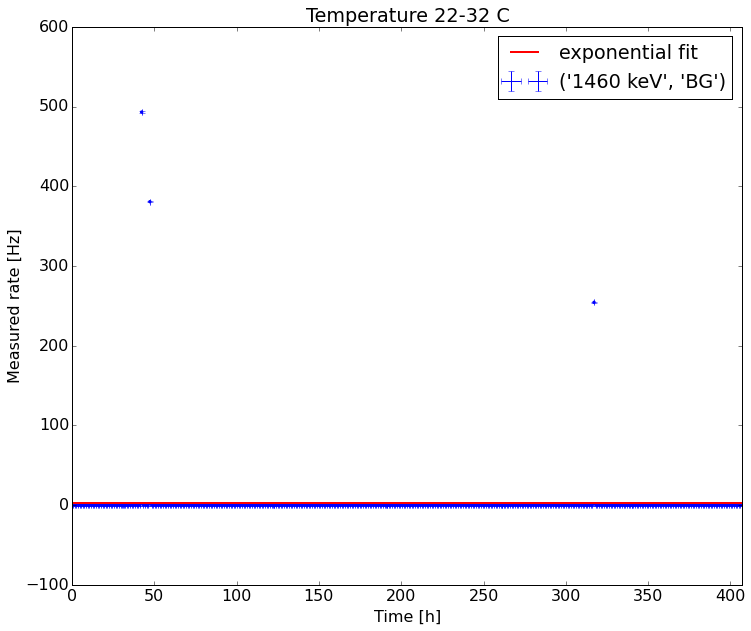

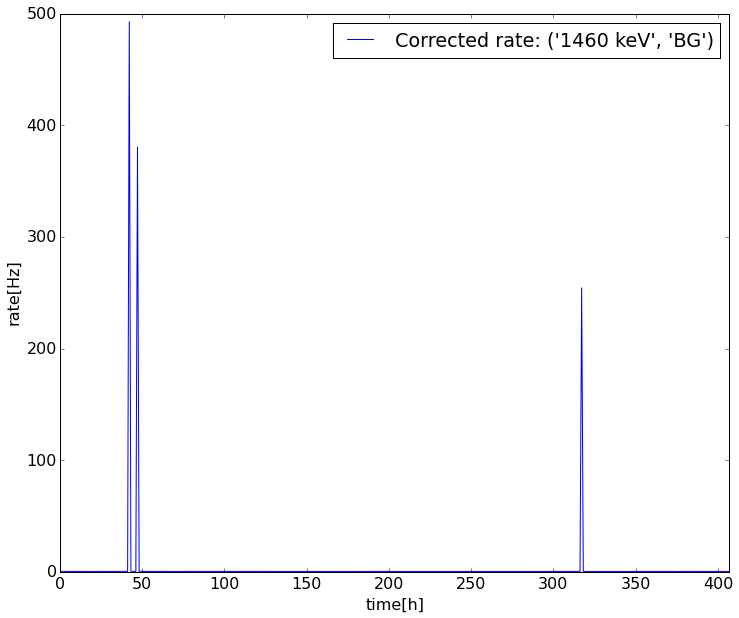

For ('1460 keV', 'BG'):
Half life time : 1251000000.0 yr
A0 : -2.94555497045 +- 4.90479417068 Bq


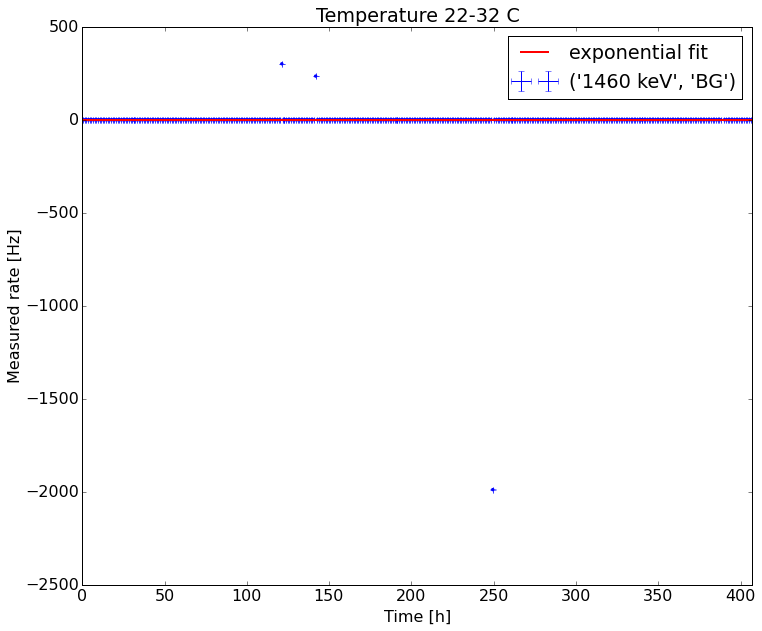

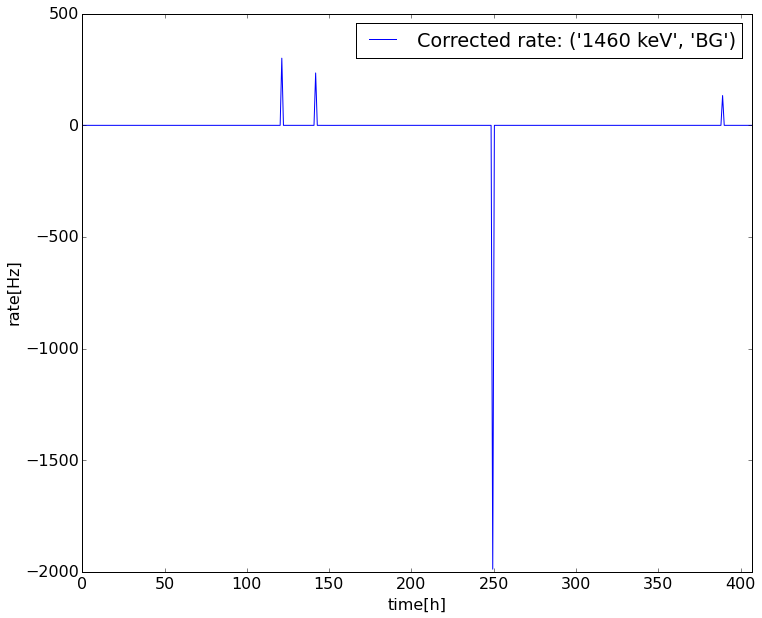

For ('511 keV', 'Ti'):
Half life time : 58.9 yr
A0 : 200.608215792 +- 0.0125971240476 Bq


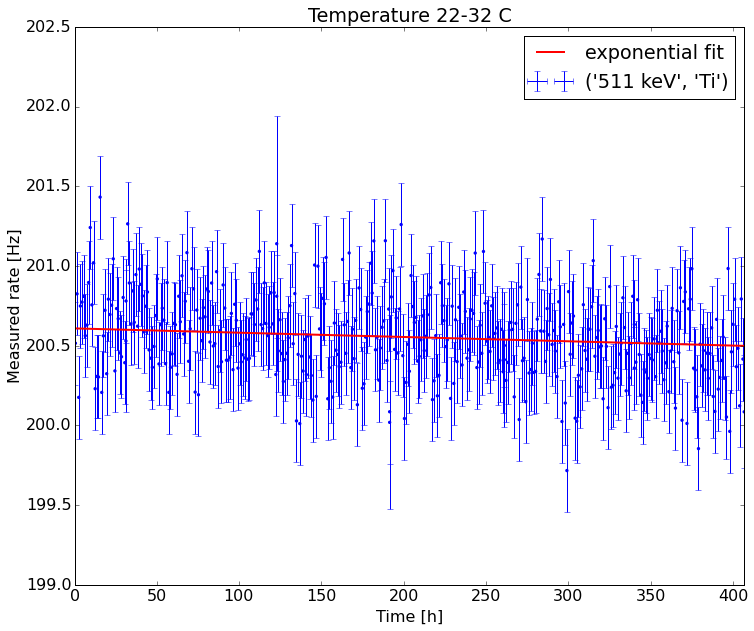

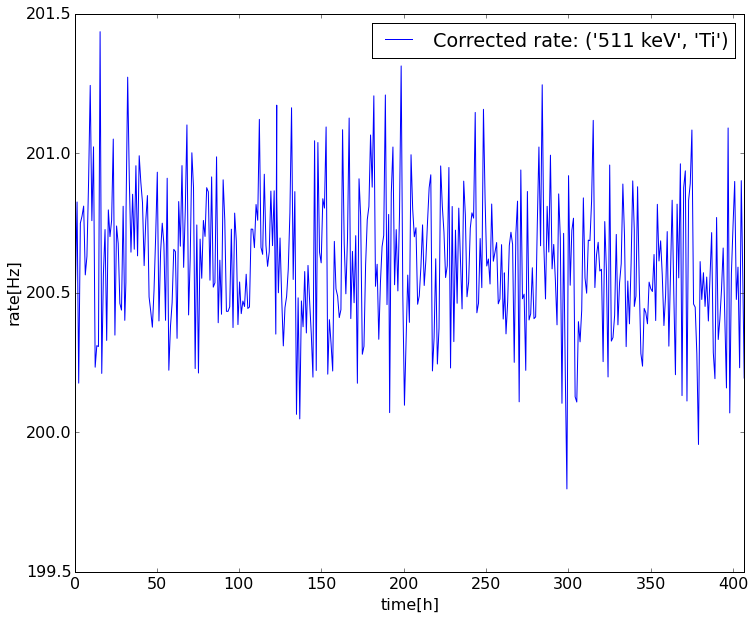

Half life time : 58.9 yr
A0 : 200.608215792 +- 0.0125971240476 Bq
For ('1157 keV', 'Ti'):
Half life time : 58.9 yr
A0 : 29.6700229277 +- 0.00660588441268 Bq


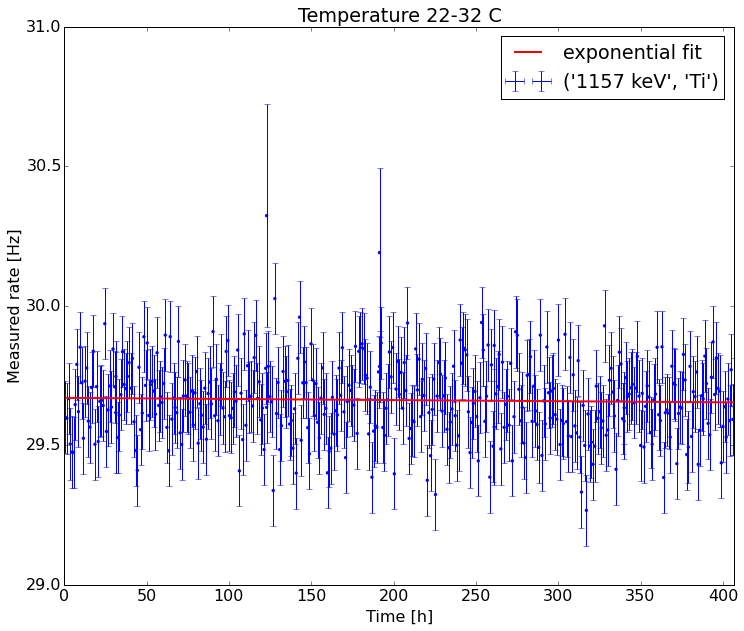

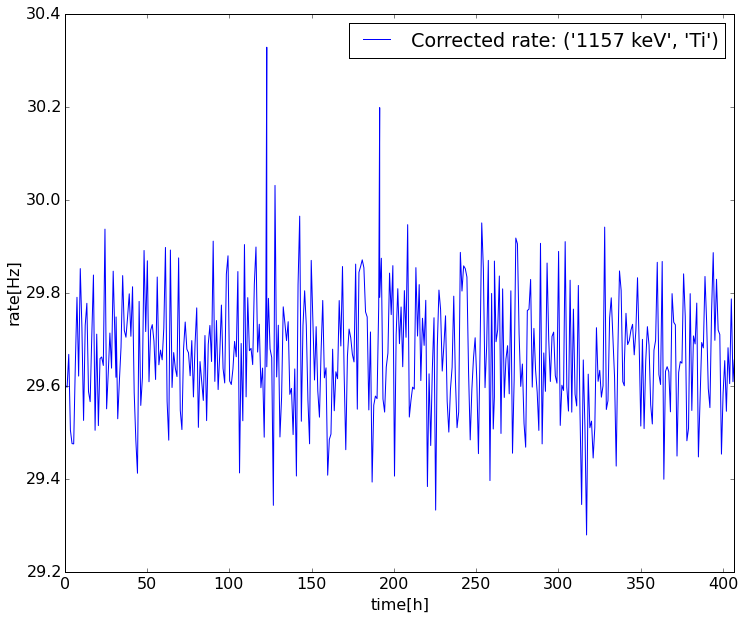

For ('511.+1157 keV', 'Ti'):
Half life time : 58.9 yr
A0 : 21.6871948623 +- 0.00446157109771 Bq


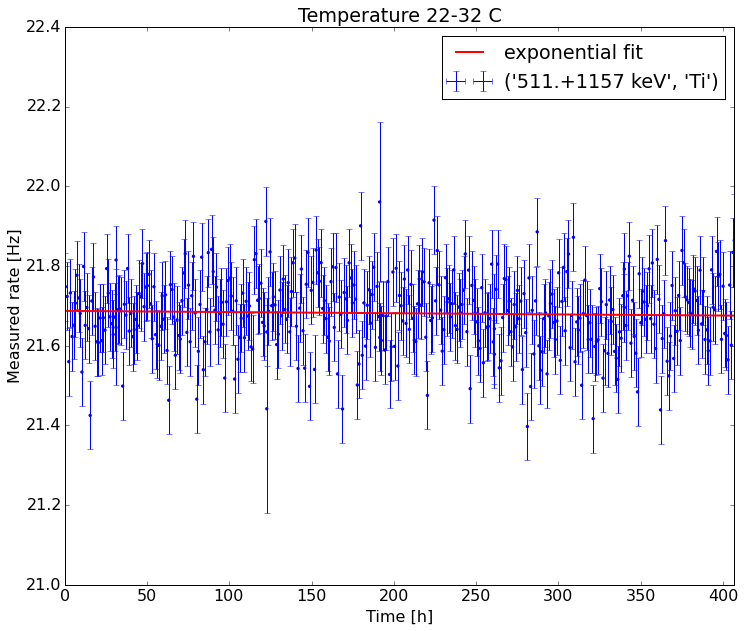

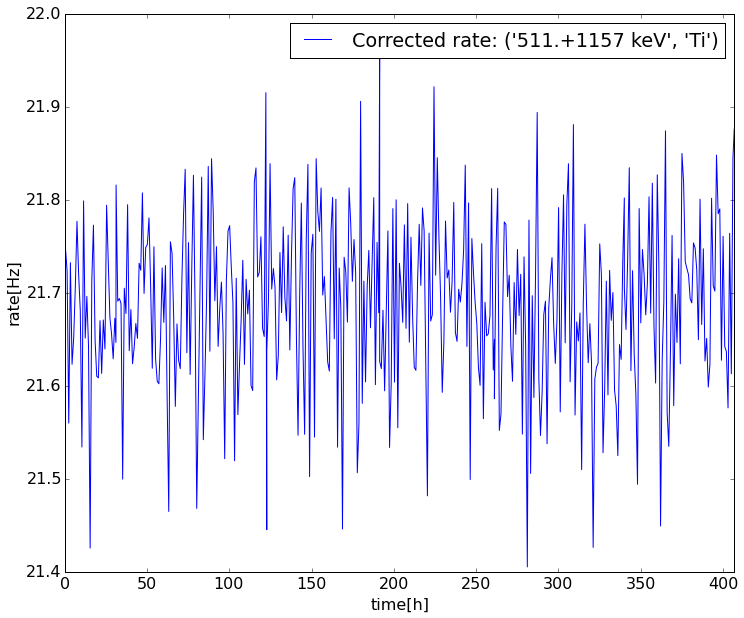

For ('511 keV', 'Ti'):
Half life time : 58.9 yr
A0 : 200.962051001 +- 0.0126487793649 Bq


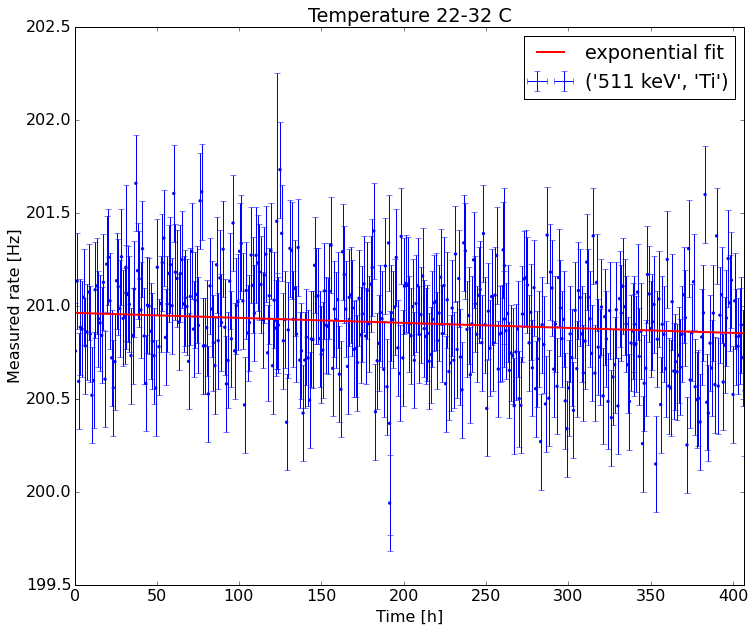

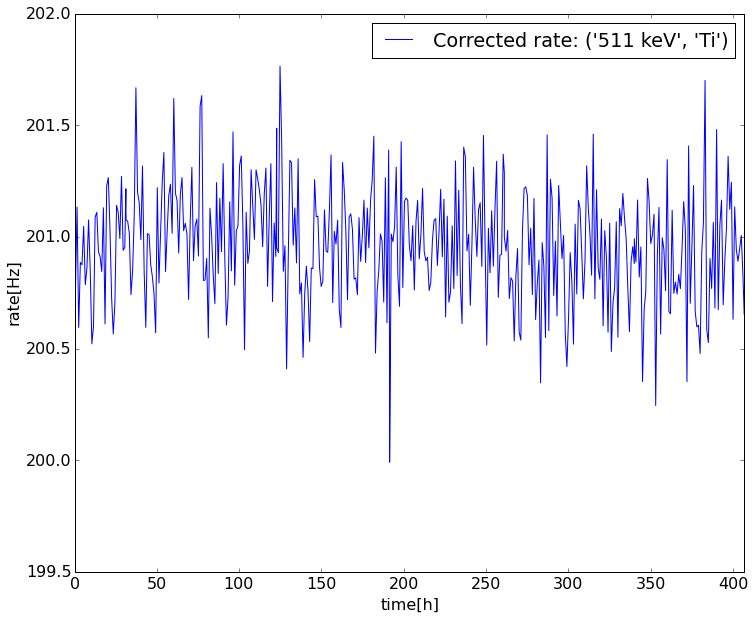

For ('1157 keV', 'Ti'):
Half life time : 58.9 yr
A0 : 30.7087149254 +- 0.00657992410581 Bq


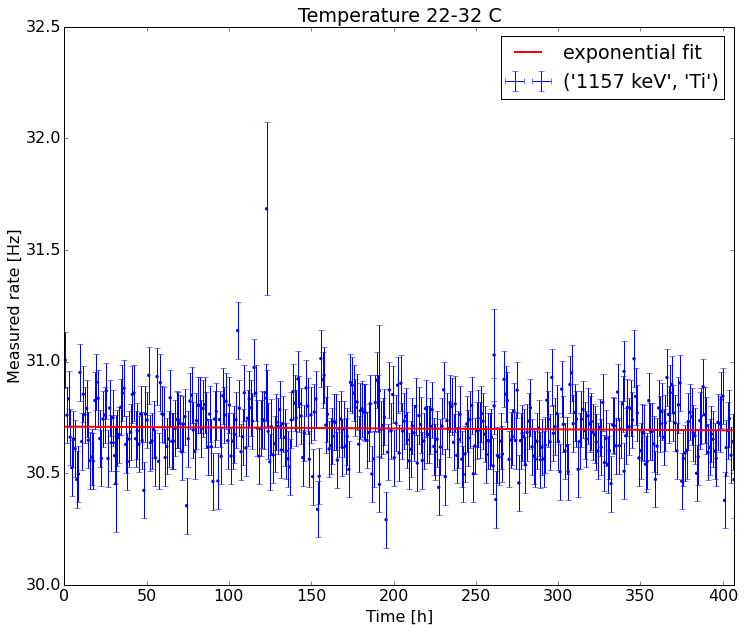

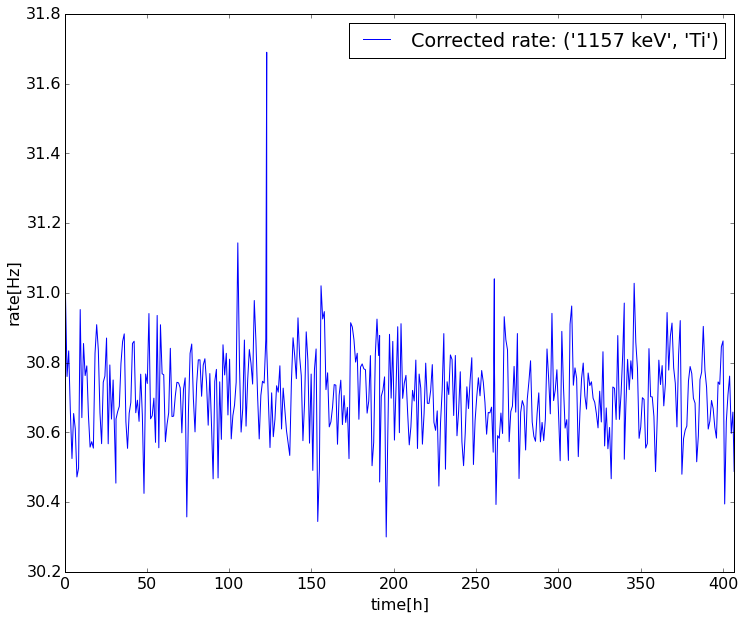

For ('511.+1157 keV', 'Ti'):
Half life time : 58.9 yr
A0 : 22.8968848271 +- 0.00445502168085 Bq


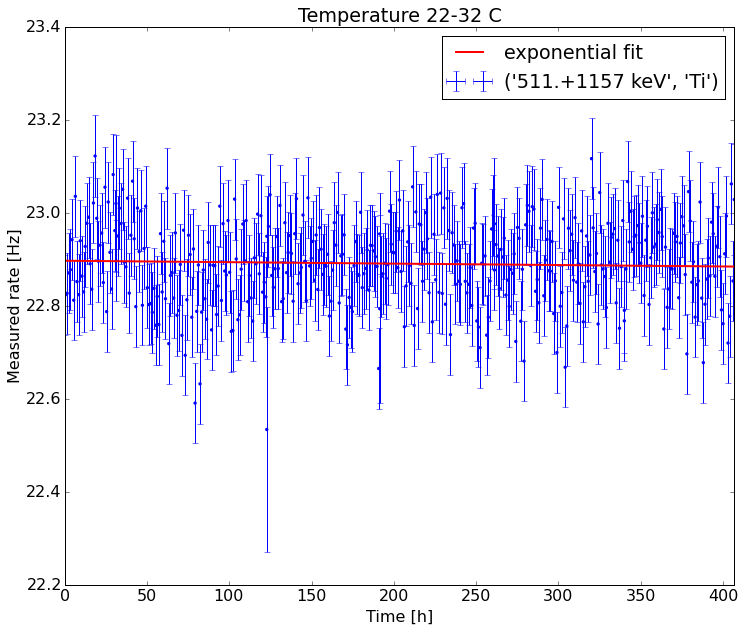

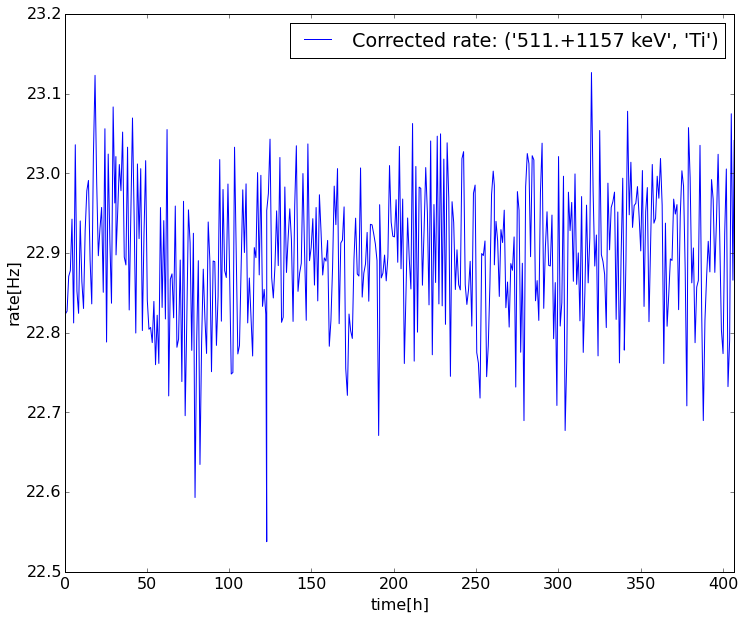

For ('1173 keV', 'Co'):
Half life time : 5.27 yr
A0 : 34.8833168142 +- 0.00556815286442 Bq


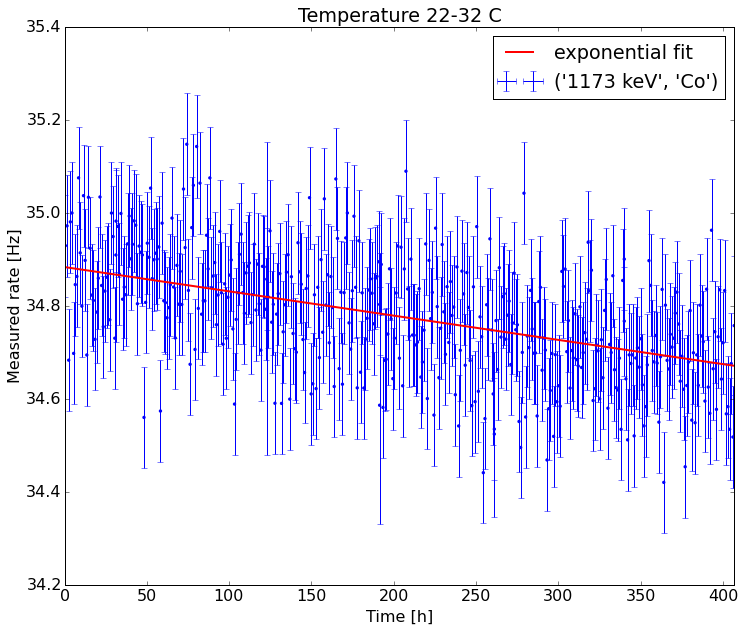

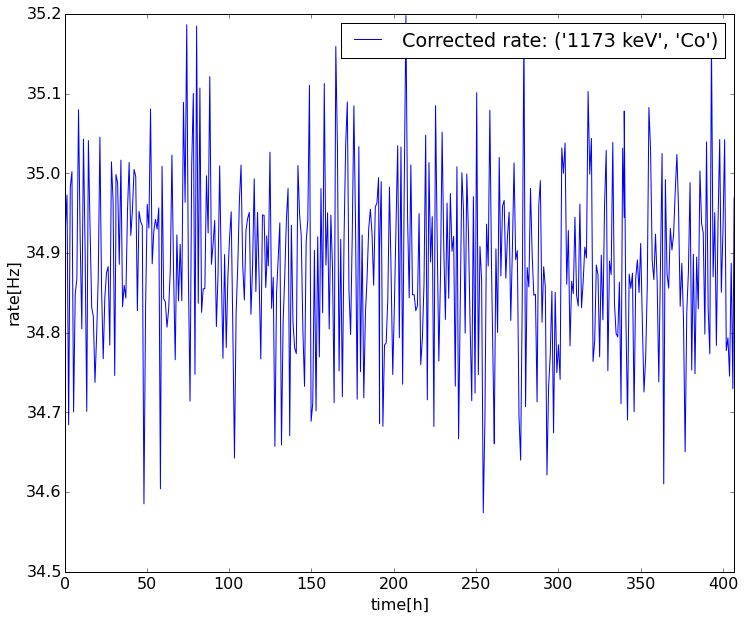

For ('1332 keV', 'Co'):
Half life time : 5.27 yr
A0 : 30.8440536373 +- 0.00483688827778 Bq


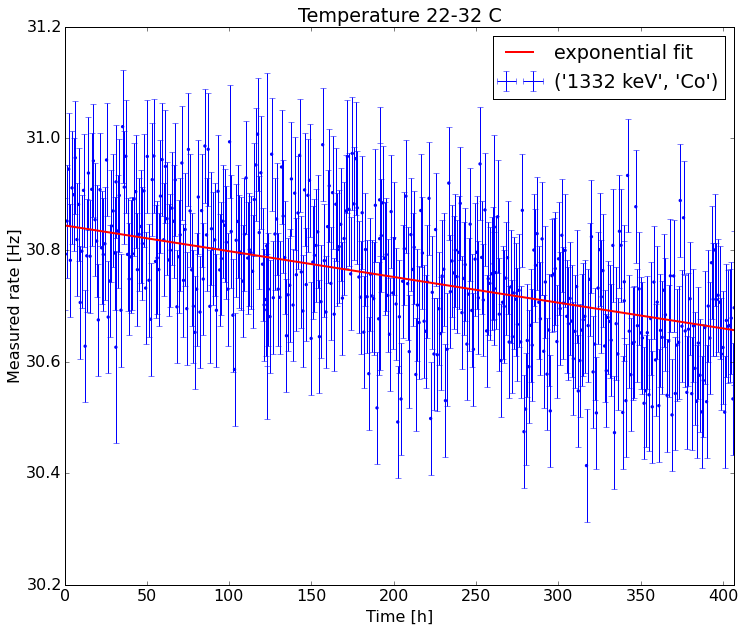

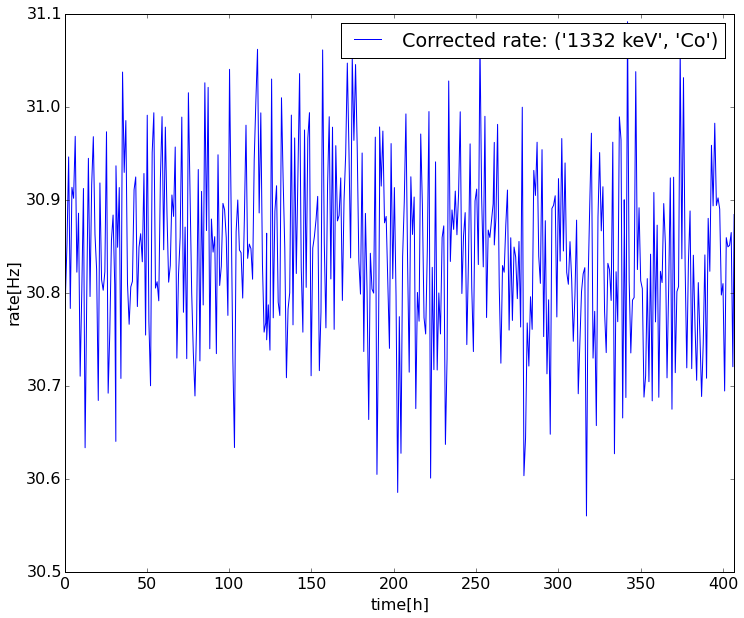

For ('1332 + 1173 keV', 'Co'):
Half life time : 5.27 yr
A0 : 3.69663629058 +- 0.00169735112611 Bq


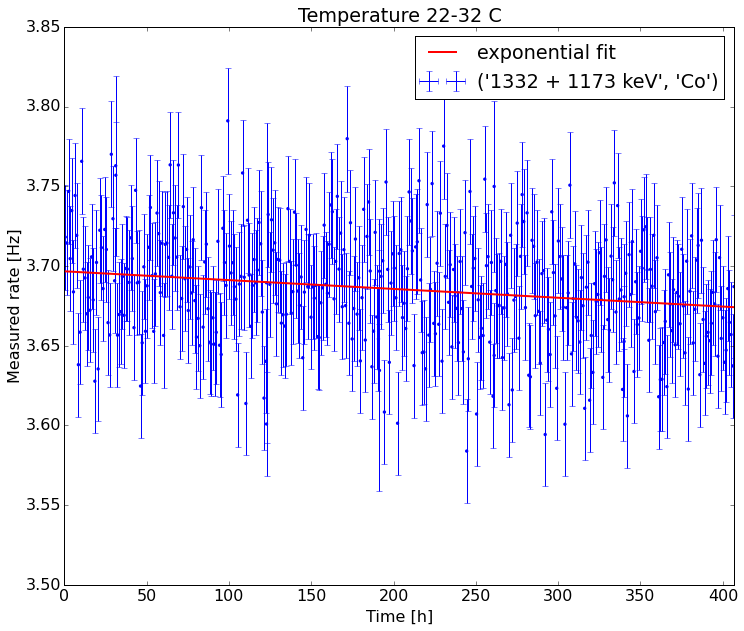

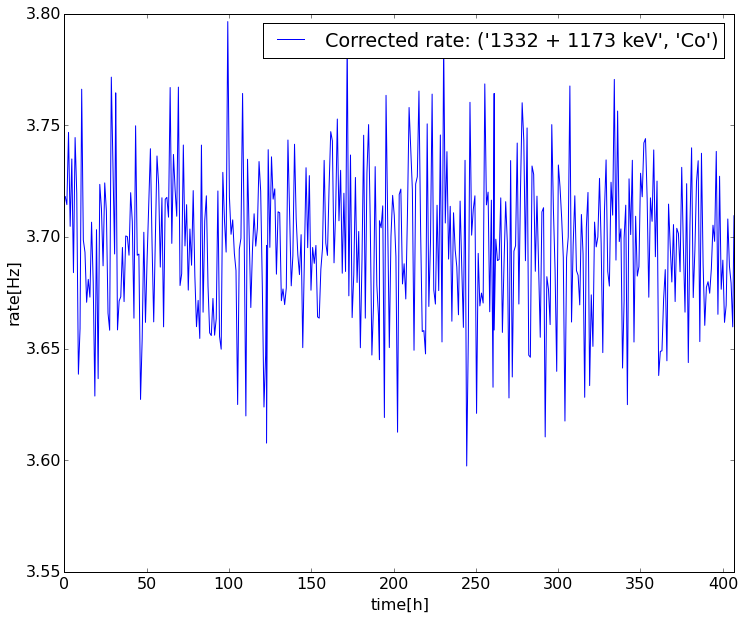

For ('1173 keV', 'Co'):
Half life time : 5.27 yr
A0 : 33.8394569991 +- 0.00557183049999 Bq


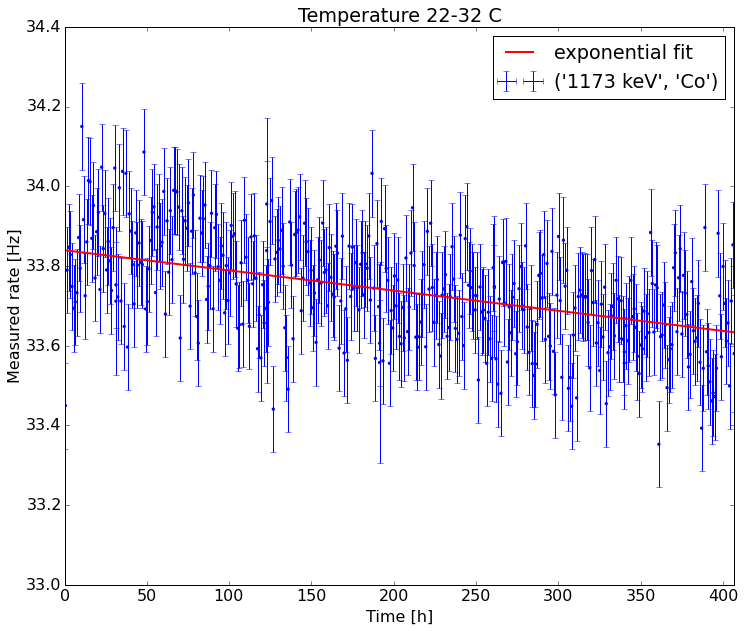

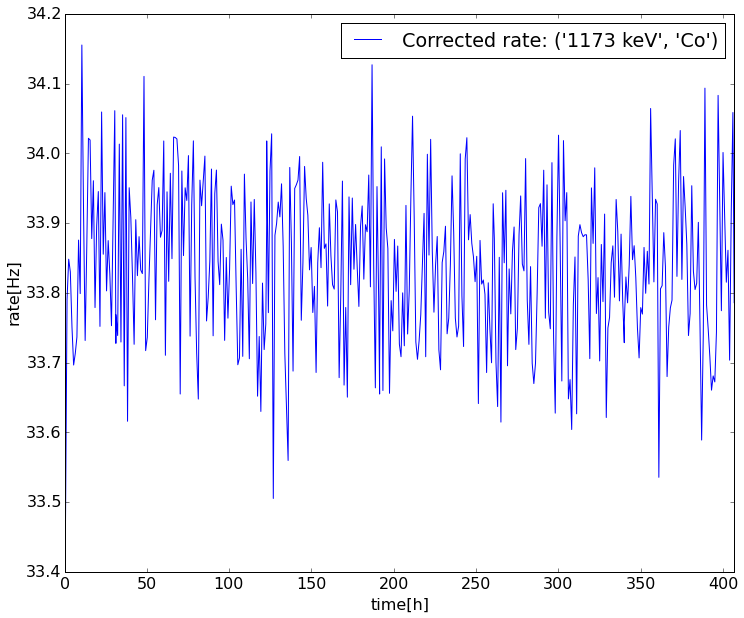

For ('1332 keV', 'Co'):
Half life time : 5.27 yr
A0 : 30.0061209317 +- 0.00505634695143 Bq


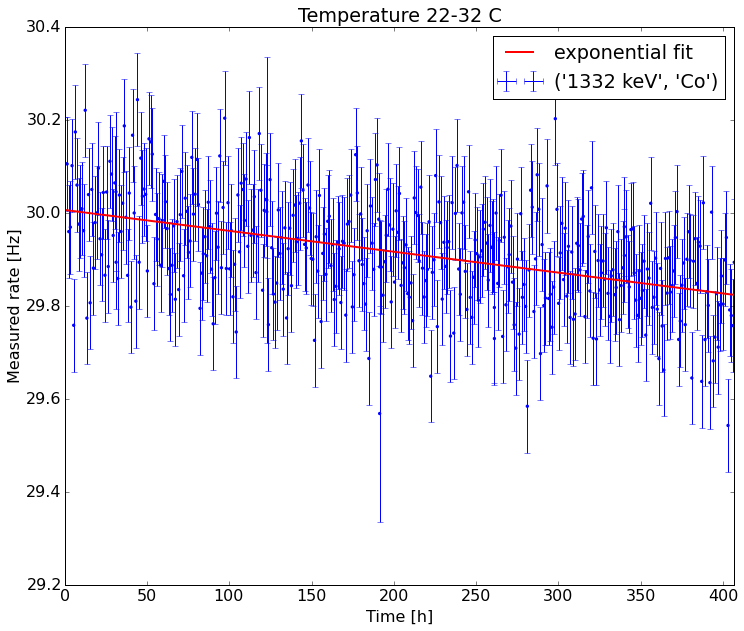

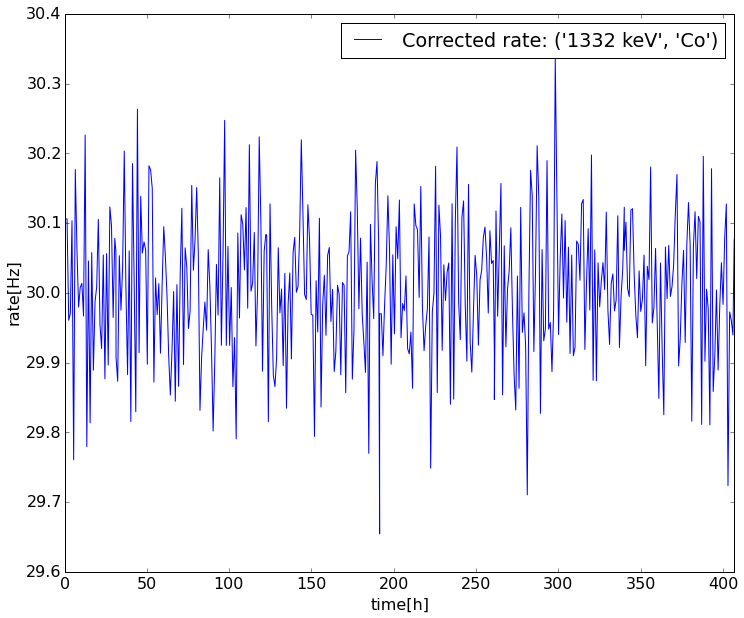

For ('1332 + 1173 keV', 'Co'):
Half life time : 5.27 yr
A0 : 3.39142790642 +- 0.00149135384932 Bq


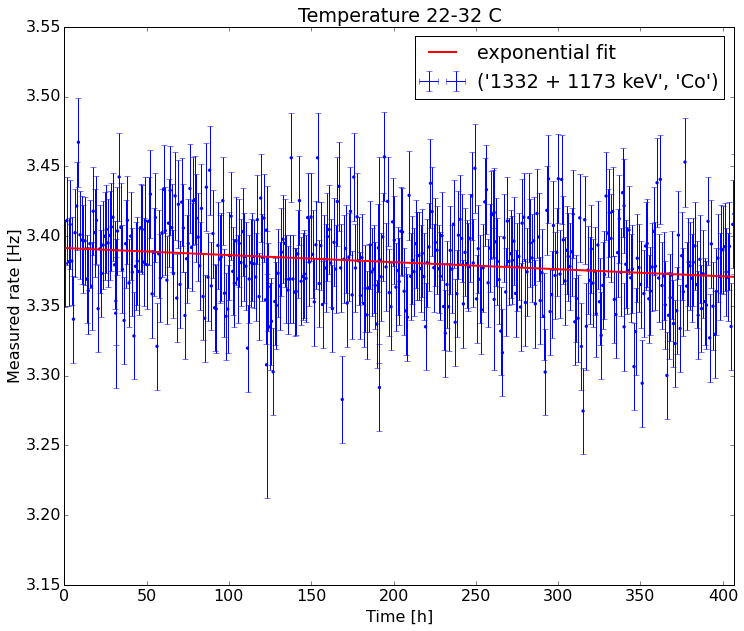

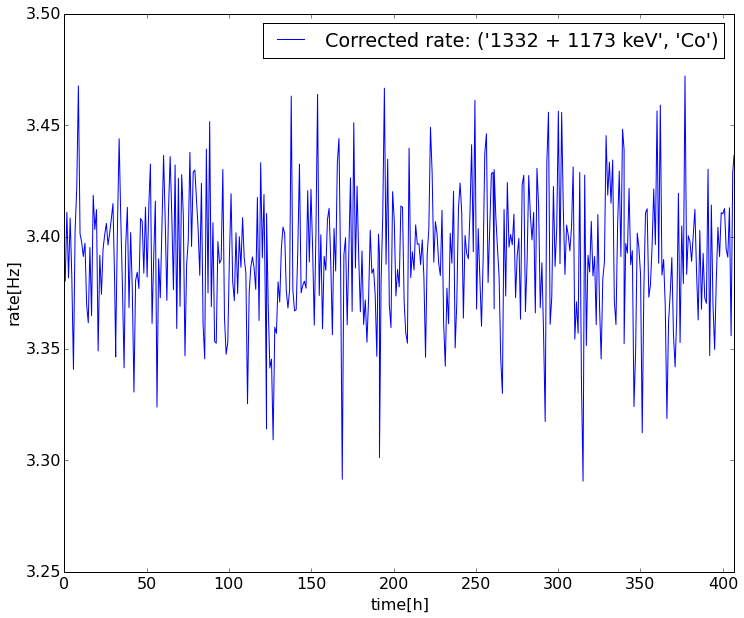

For ('662 keV', 'Cs'):
Half life time : 30.05 yr
A0 : 84.2607454166 +- 0.00828879893624 Bq


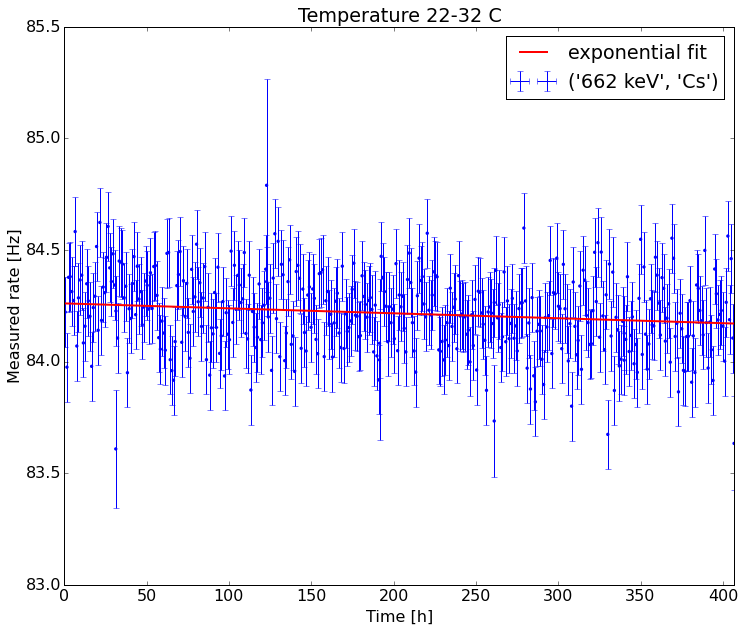

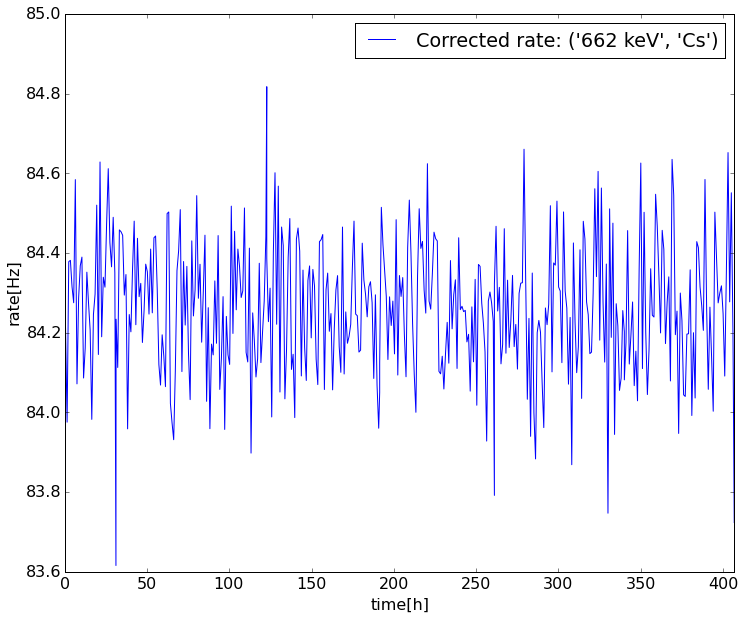

For ('662 keV', 'Cs'):
Half life time : 30.05 yr
A0 : 112.335956334 +- 0.00870847869921 Bq


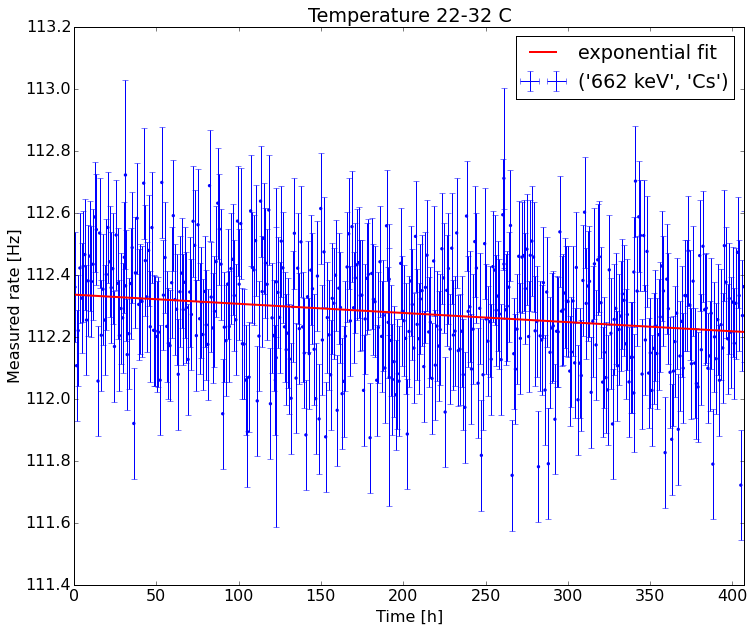

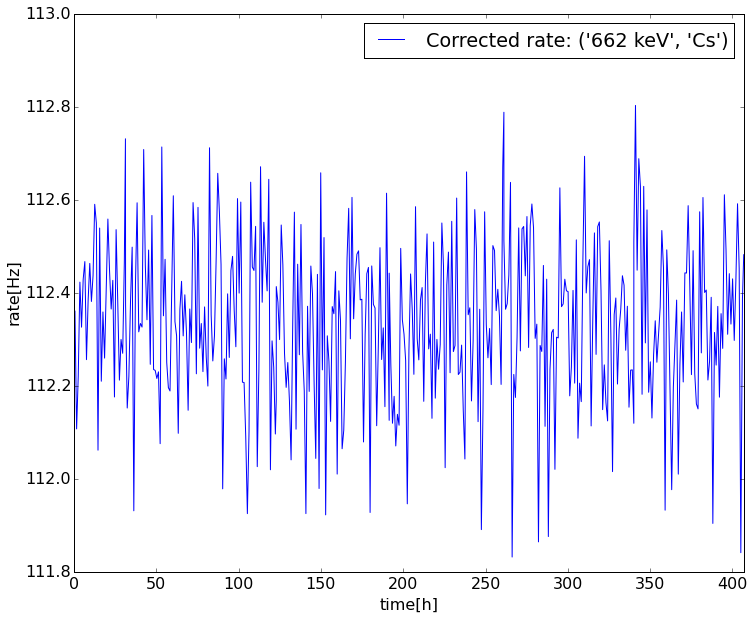

In [6]:
# Plot temperature vs time: Get data, organize and average data per degree and determine and caculate errors
data = recursive_defaultdict()
degrees = np.linspace(23,32,10)
lists = recursive_defaultdict()

for (channel_i, peak_i), peakd in datas.groupby(['channel','peak']):
    rate = peakd['rate']
    drate = peakd['drate'] # error on rate according to dataset (thus from AP's code)
    temp = peakd['temp']
    pres = peakd['pres']
    bx   = peakd['bx']
    by   = peakd['by']
    bz   = peakd['bz']
    btot = peakd['btot']
    humid= peakd['humid']
    time = data_time_hours

    # for every channel and peak combination fill lists with data
    lists['rate']['value'] = np.array(rate)
    lists['temp']['value'] = np.array(temp)
    lists['time']['value'] = np.array(time)
    lists['pres']['value'] = np.array(pres)
    lists['btot']['value'] = np.array(btot)
    lists['humid']['value'] = np.array(humid)
    
    # add errors    
    # HACK: rate should not have negative numbers!
    # Each datapoint is 1 hour of data
#     lists['rate']['error'] = ((np.abs(np.array(rate))*60*60)**(0.5))/(60*60)
    lists['rate']['error'] = np.array(drate)
    lists['temp']['error'] = [0.5]*len(temp)
    lists['time']['error'] = [0.00000000001*60*60]*len(time) # just very, very small
    # !! Don't know the errors in the var below jet, 0.0001 is a random, small choice
    lists['pres']['error'] = [0.0001]*len(pres)
    lists['btot']['error'] = [0.0001]*len(btot)
    lists['humid']['error'] = [0.0001]*len(humid)
    
    # make lists within loop over variables with very scary default dicts
    for var in lists: 
        for degree in degrees:
            data[channel_i][peak_i][var][degree]['value'] = []
            data[channel_i][peak_i][var][degree]['error'] = []
        
    # Define fit-function. Use half life time from literature
    if channel_i == 0 or channel_i == 1:
        half_life_time = (1.251*10**9)*365.25*24*60*60.
    elif channel_i == 2 or channel_i == 3:
        half_life_time = (58.9)*365.25*24*60*60.
    elif channel_i == 4 or channel_i == 5:
        half_life_time = (5.27)*365.25*24*60*60.
    elif channel_i == 6 or channel_i == 7:
        half_life_time = (30.05)*365.25*24*60*60.
    
    print("For %s:" % (fit_values[channel_i][peak_i],))
    # Determine first guess for A0(measured) and half-life
    guessA0 = max(lists['rate']['value']) #max value is presumably the activity at t=0 (since it only decreases)
    guessExp = (guessA0)
    
    # Now fit exponent to data
    found_fit_signal = fit_signal(lists['rate']['value'], guessExp, time)
    found_residual = residual(time, lists['rate']['value'], found_fit_signal[0])
    
    # plot rate vs time    
    plt.xlabel('Time [h]')
    plt.ylabel('Measured rate [Hz]')
    plt.errorbar(time, lists['rate']['value'], xerr=lists['time']['error'], yerr=lists['rate']['error'],fmt=None, marker=None, label = fit_values[channel_i][peak_i])
    plt.scatter(time, lists['rate']['value'], marker='.', edgecolors='none', s=45)
    plt.plot(time, found_fit_signal[0], 'r', linewidth=2.0, label="exponential fit")
    plt.title('Temperature 22-32 C')
    plt.xlim(0,max(time))   
    plt.legend()
    if channel_i == 2 and peak_i == 0:
        plt.savefig('rate_vs_time_fitEXP_Ti_511kev_T22-32.png', format='png', dpi=300)
        plt.savefig('rate_vs_time_fitEXP_Ti_511kev_T22-32.pdf', format='pdf', dpi=300)
    plt.show()
   
    # Calculate corrected rate:
    corr_rate = found_residual+found_fit_signal[1]
    plt.plot(time, corr_rate, label='Corrected rate: %s' %(fit_values[channel_i][peak_i],))
    plt.xlim(0, max(time))
    plt.xlabel('time[h]')
    plt.ylabel('rate[Hz]')
    plt.legend()
#     if channel_i == 2 and peak_i == 0:
#         plt.savefig('residual_Ti_511keV.png', format='png', dpi=300)
    plt.show()
    
    # For now: save only the arrays for the Ti-44 pk0 measurement.
    # Because we only need one to show the plot. 
    if channel_i == 2 and peak_i == 0:
        found_fit_signalTipk0 = fit_signal(lists['rate']['value'], guessExp, time)
        np.savetxt('ti44pk0_rate_T22_32', (lists['rate']['value']))
        np.savetxt('ti44pk0_error_rate_T22_32', (lists['rate']['error']))
        np.savetxt('ti44pk0_residual_T22_32', (found_residual))
        np.savetxt('ti44pk0_foundFitA0_and_Error22_32', (found_fit_signalTipk0[1], found_fit_signalTipk0[2]))
        np.savetxt('ti44pk0_corrected_rate_T22_32', (found_residual+found_fit_signalTipk0[1]))
        np.savetxt('ti44pk0_time_T22_32', (time))
        
        np.savetxt('ti44pk0_pres_T22_32', (pres))
        np.savetxt('ti44pk0_temp_T22_32', (temp))
        np.savetxt('ti44pk0_humid_T22_32', (humid))
        
        # Slow control parameters temperature, pressure and humidity plotted.
        # Just for fun. To see whether strange things happen.
#         # Time vs temp
#         plt.xlabel('Time [h]')
#         plt.ylabel('Temperature [C]')
#         plt.errorbar(time, lists['temp']['value'], xerr=lists['time']['error'], yerr=lists['temp']['error'],fmt=None, marker=None, label = fit_values[channel_i][peak_i])
#         plt.scatter(time, lists['temp']['value'], marker='.', edgecolors='none', s=45)
#         plt.title('Temperature constant')
#         plt.xlim(0,max(time))   
#         plt.ylim(21,33)
#         plt.legend()
#         plt.show()
        
#         # Time vs pres
#         plt.xlabel('Time [h]')
#         plt.ylabel('Pressure []')
#         plt.errorbar(time, lists['pres']['value'], xerr=lists['time']['error'], yerr=lists['pres']['error'],fmt=None, marker=None, label = fit_values[channel_i][peak_i])
#         plt.scatter(time, lists['pres']['value'], marker='.', edgecolors='none', s=45)
#         plt.title('Temperature constant')
#         plt.xlim(0,max(time))   
#         plt.ylim(97500.,104000)
#         plt.legend()
#         plt.show()
        
#         # Time vs humid
#         plt.xlabel('Time [h]')
#         plt.ylabel('Humidity []')
#         plt.errorbar(time, lists['humid']['value'], xerr=lists['time']['error'], yerr=lists['humid']['error'],fmt=None, marker=None, label = fit_values[channel_i][peak_i])
#         plt.scatter(time, lists['humid']['value'], marker='.', edgecolors='none', s=45)
#         plt.title('Temperature constant')
#         plt.xlim(0,max(time))   
#         plt.ylim(-20.,-10)
#         plt.legend()
#         plt.show()    